In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('moto_cleaned_371.csv')

In [12]:
df.columns

Index(['Unnamed: 0', 'categorty', 'color', 'color_fix', 'dealer', 'hand', 'km',
       'km_fix', 'owner', 'license', 'licence', 'lising', 'location',
       'district', 'region', 'maker', 'price_fix', 'model', 'price', 'size',
       'test', 'year'],
      dtype='object')

<AxesSubplot:>

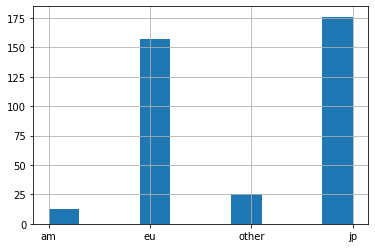

In [13]:
df.region.hist()

<AxesSubplot:>

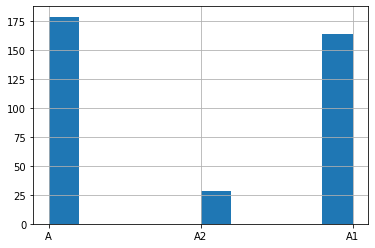

In [14]:
df.license.hist()

<AxesSubplot:>

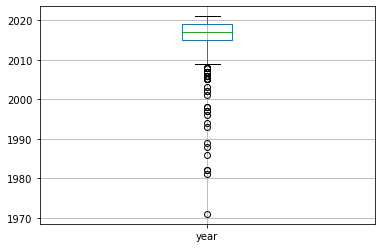

In [15]:
df.boxplot(column='year')

<AxesSubplot:>

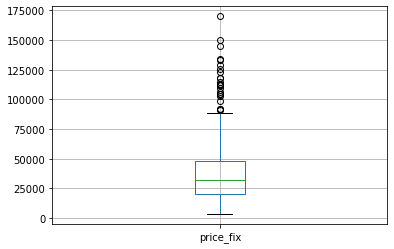

In [16]:
df.boxplot(column='price_fix')

In [17]:
df[['hand','km_fix','price_fix','size']].corr()

,hand,km_fix,price_fix,size
hand,1.000000,0.350064,-0.297480,0.013515
km_fix,0.350064,1.000000,-0.128901,0.379983
price_fix,-0.297480,-0.128901,1.000000,0.679009
size,0.013515,0.379983,0.679009,1.000000


<AxesSubplot:>

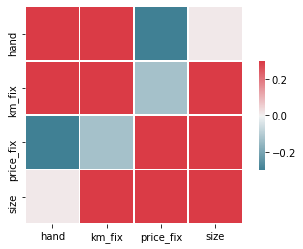

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[['hand','km_fix','price_fix','size']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
df.columns

Index(['Unnamed: 0', 'categorty', 'color', 'color_fix', 'dealer', 'hand', 'km',
       'km_fix', 'owner', 'license', 'licence', 'lising', 'location',
       'district', 'region', 'maker', 'price_fix', 'model', 'price', 'size',
       'test', 'year'],
      dtype='object')

In [20]:
df2=df[['categorty','hand','km_fix', 'license','district','region','price_fix', 'size','year']]

category: categorty, total values: 4


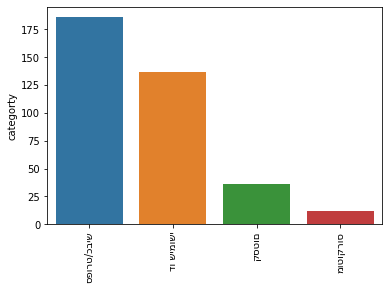

category: hand, total values: 10


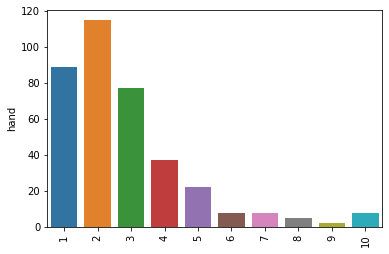

category: km_fix, total values: 198


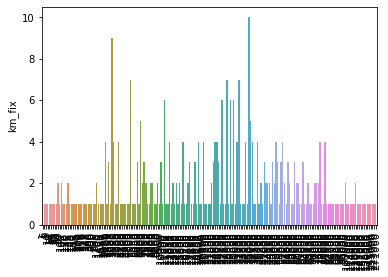

category: license, total values: 3


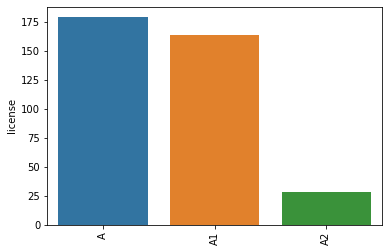

category: district, total values: 7


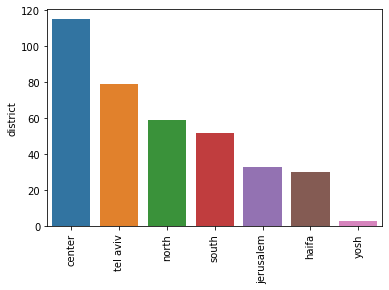

category: region, total values: 4


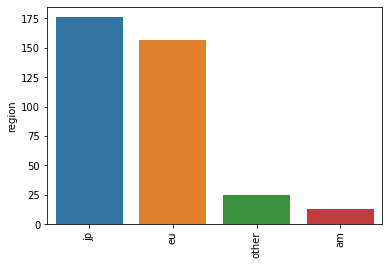

category: price_fix, total values: 144


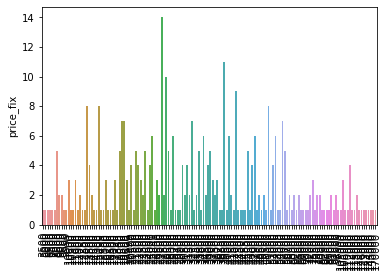

category: size, total values: 27


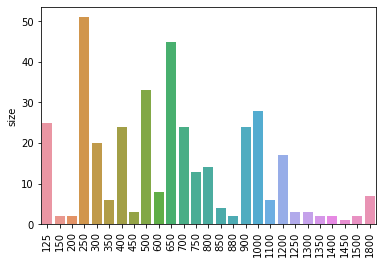

category: year, total values: 31


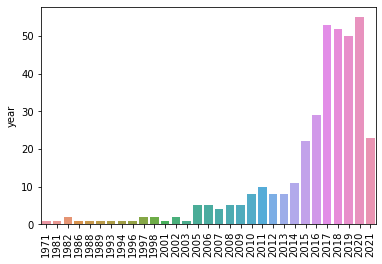

In [21]:
for i in df2.columns:
    cat_tot=df2[i].value_counts()
    print('category: %s, total values: %d' % (i,len(cat_tot)))
    chart=sns.barplot(x=cat_tot.index, y=cat_tot)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [22]:
df2.head()

,categorty,hand,km_fix,license,district,region,price_fix,size,year
0,קסטום,1,27000,A,tel aviv,am,129000,1800,2018
1,דו שימושי,2,175000,A,south,eu,45000,1200,2011
2,ספורט/כביש,4,8900,A2,haifa,eu,13500,125,2019
3,דו שימושי,1,3000,A1,center,other,45000,500,2021
4,דו שימושי,2,45000,A,haifa,eu,112000,1200,2017


category: km_fix, total values: 30


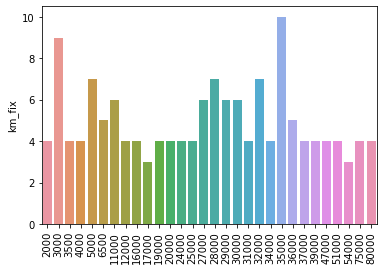

category: price_fix, total values: 30


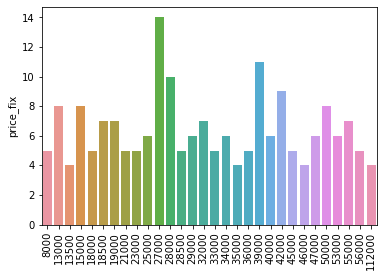

In [23]:
for i in df2[['km_fix','price_fix']].columns:
    cat_tot=df2[i].value_counts()[:30]
    print('category: %s, total values: %d' % (i,len(cat_tot)))
    chart=sns.barplot(x=cat_tot.index, y=cat_tot)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [24]:
pd.pivot_table(df, index= 'license', values=['price_fix','km_fix'])

,km_fix,price_fix
license,,
A,50438.195531,51429.597765
A1,19880.829268,29476.445122
A2,11391.428571,17003.571429


In [25]:
pd.pivot_table(df, index= 'categorty', values=['price_fix','km_fix'])

,km_fix,price_fix
categorty,,
דו שימושי,38884.664234,39527.372263
מוטוקרוס,3057.166667,26908.333333
ספורט/כביש,31651.817204,36870.349462
קסטום,37686.944444,53336.111111


In [26]:
pd.pivot_table(df, index= 'hand', values=['price_fix','km_fix'])

,km_fix,price_fix
hand,,
1,16894.269663,50398.764045
2,29822.278261,43405.634783
3,37301.987013,34152.571429
4,40477.189189,29121.621622
5,68486.681818,28659.090909
6,38391.125000,28875.000000
7,48688.250000,18781.250000
8,78890.000000,19799.800000
9,85000.000000,18250.000000


In [27]:
pd.pivot_table(df, index= ['license','categorty'], values=['price_fix','km_fix'])

km_fix     price_fix
license categorty                             
A       דו שימושי   74672.129630  52912.962963
        ספורט/כביש  38948.156863  48271.549020
        קסטום       44496.956522  61952.173913
A1      דו שימושי   16207.148649  32175.000000
        מוטוקרוס     4334.857143  27200.000000
        ספורט/כביש  24249.757143  25251.242857
        קסטום       25638.461538  38092.307692
A2      דו שימושי   10619.444444  19666.666667
        מוטוקרוס     1268.400000  26500.000000
        ספורט/כביש  15503.071429  11900.000000

In [28]:
pd.pivot_table(df2, index='km_fix' , values='price_fix',)

,price_fix
km_fix,
1,18500.0
6,38000.0
8,55000.0
10,11000.0
18,18000.0
...,...
175000,45000.0
195000,25000.0
215000,18500.0


In [29]:
pd.pivot_table(df2, index= ['license','size'], values=['price_fix','km_fix','year'])

km_fix      price_fix         year
license size                                           
A       400     5050.000000   31750.000000  2019.000000
        500    60116.666667   40000.000000  1983.333333
        600    59743.750000   51687.375000  2013.250000
        650    55043.055556   26077.777778  2014.527778
        700    61700.000000   31127.272727  2014.727273
        750    33636.363636   35627.272727  2012.181818
        800    58469.769231   35730.769231  2012.307692
        850    26497.500000   55250.000000  2011.750000
        880     5000.000000   55000.000000  2019.000000
        900    26689.850000   46405.000000  2017.700000
        1000   34136.428571   68242.821429  2015.571429
        1100   39680.000000   76000.000000  2004.500000
        1200   98682.500000   71906.250000  2012.812500
        1250   24333.333333  114333.333333  2018.333333
        1300   50666.666667   65666.666667  2014.000000
        1350   68500.000000   57500.000000  2004.000000
        1400  173000.000000   26000.000000  2007.000000
        1450   35000.000000   79900.000000  2005.000000
        1500   55000.000000   74500.000000  2002.500000
        1800   42724.714286  116285.714286  2014.571429
A1      150       55.000000   26000.000000  2019.000000
        200    21500.000000    8750.000000  2017.000000
        250    16810.729167   24013.500000  2016.770833
        300    16456.100000   27060.000000  2018.850000
        350     3945.500000   34666.666667  2013.500000
        400    19339.318182   22910.954545  2017.272727
        450     1071.666667   32000.000000  2017.000000
        500    27235.200000   31574.966667  2017.500000
        650    24044.444444   38666.666667  2018.666667
        700    33592.307692   35730.692308  2017.615385
        750     5500.000000   64500.000000  2021.000000
        800    74000.000000   20000.000000  2010.000000
        880    20000.000000   79000.000000  2019.000000
        900    11250.000000   50750.000000  2019.000000
        1200    8800.000000   72000.000000  2019.000000
A2      125    11087.760000   15364.000000  2017.520000
        250    13922.000000   30666.666667  2017.333333

In [33]:
pd.pivot_table(df, index= ['maker'], values=['price_fix','km_fix','year'])

,km_fix,price_fix,year
maker,,,
AJP,6800.000000,19000.000000,2014.000000
BSE,10.000000,11000.000000,2018.000000
CF,6666.666667,24247.000000,2020.666667
MV,26500.000000,46500.000000,2015.500000
אחר,1626.000000,40000.000000,2020.000000
אינדיאן,3500.000000,89000.000000,2020.000000
אפריליה,15933.333333,29666.666667,2016.666667
ב.מ.וו,70946.454545,68136.363636,2015.590909
בטא,756.666667,37300.000000,2019.333333


In [34]:
pd.pivot_table(df, index= ['region'], values=['price_fix','km_fix','year'])

,km_fix,price_fix,year
region,,,
am,29869.230769,91607.692308,2013.923077
eu,33197.643312,41855.082803,2015.382166
jp,36780.340909,35790.034091,2015.329545
other,21367.320000,18197.640000,2017.680000


In [35]:
pd.pivot_table(df, index= ['district'], values=['price_fix','km_fix','year'])

,km_fix,price_fix,year
district,,,
center,35029.834783,39908.608696,2014.860870
haifa,29584.300000,44088.300000,2016.433333
jerusalem,47723.242424,36292.393939,2014.454545
north,35397.983051,36839.830508,2015.457627
south,30156.153846,38061.519231,2015.711538
tel aviv,28675.569620,39602.506329,2016.291139
yosh,65018.333333,41666.666667,2013.666667


In [36]:
pd.pivot_table(df, index= ['year'], values=['price_fix','km_fix'])

,km_fix,price_fix
year,,
1971,100000.000000,30000.000000
1981,70000.000000,25000.000000
1982,35040.000000,35000.000000
1986,62000.000000,29000.000000
1988,80000.000000,39000.000000
1989,65420.000000,36000.000000
1993,20000.000000,32000.000000
1994,99000.000000,32000.000000
1996,46000.000000,22000.000000
